### importando librerias

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### seguimos usando aca nuestra funcion para mostrar dos imagenes enviadas

In [8]:
def mostrar_imagenes(imagen1, imagen2,tipoKernel):
   
    plt.figure(figsize=(10, 5))
    
    # Mostrar la imagen a color
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(imagen1, cv2.COLOR_BGR2RGB))
    plt.title('Imagen a color')
   
    # Mostrar la imagen convolucionada con el filtro
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(imagen2, cv2.COLOR_BGR2RGB))
    plt.title(tipoKernel)
    
    plt.show()

### funcion que devuelve una imagen en escala de grises

In [9]:
def escalaGrisPonderado(img):
    """Convierte una imagen a escala de grises utilizando la ponderación estándar."""
    gris = np.zeros_like(img, dtype=np.uint8)[:, :, 0]
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            pixel = img[i, j]
            gris[i, j] = int(0.299*pixel[0] + 0.587*pixel[1] + 0.11*pixel[2])
    return gris

### funcion de ecualización que recibe la imagen ya con escala de grises

In [10]:
def ecualizacion(imagen):
    # obteniendo el histograma de la imagen recibida en escala de grises
    histograma = cv2.calcHist([imagen], [0], None, [256], [0, 256])
    histograma = histograma / histograma.sum() 
    
    # obtenemosla varianza del histograma
    media_histograma = np.mean(histograma)
    varianza_histograma = np.var(histograma)
    
   # el valor que vamos a validar contra el valor de 0.5 dado en el problema es la media por eso la calculamos primero
    vamosEcualizar = 1 - np.sqrt(varianza_histograma / media_histograma)
    
    # si el resultado anterior es mayor a 0.5 si necesitamos ecualizar y regresamos tambien esta imagen
    if vamosEcualizar > 0.5:
        imagen_ecualizada = cv2.equalizeHist(imagen)
        return vamosEcualizar, imagen_ecualizada # si es necesario ecualizar regresamos la nueva imagen y el valor dado.
    else:
        return vamosEcualizar, imagen # si no es necesario ecualizar regresamos la imagen recibida


### probando las funciones

Valor de necesidad de ecualización: 0.9503524750471115
era necesario ecualizar la imagen.


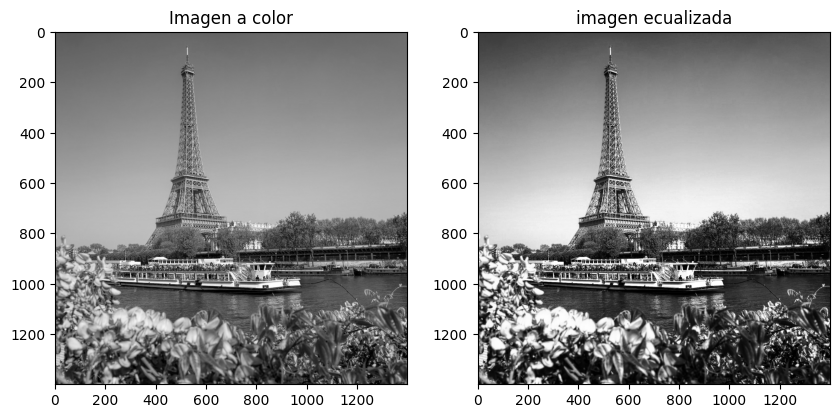

In [15]:

# Prueba de la fucción
imagen = cv2.imread('paris.jpg')
imagen=escalaGrisPonderado(imagen) #la convierto a escala de grises
valorEcualizacion, imagen_resultado = ecualizacion(imagen)

print(f'Valor de necesidad de ecualización: {valor_necesidad}')
if valorEcualizacion > 0.5:
    print('era necesario ecualizar la imagen.')
    mostrar_imagenes(imagen,imagen_resultado,"imagen ecualizada")
else:
    print('no era necesario ecualizar la imagen.')
    mostrar_imagenes(imagen,imagen,"imagenes iguales, no ecualizadas")


